# Program-15 : Show the calculation and demonstration of KNN (3,4,5 NN) using sklearn

In [11]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)
clf = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size= 30, p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [14]:
# Define color map
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolors='k', s=40)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title(f"KNN Decision Boundary (k = {k}) on Iris Dataset")
plt.show()

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler

In [4]:
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist['data'],mnist['target'].astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(X_scaled)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size= 0.2, random_state = 42)
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy:',np.round(metrics.accuracy_score(ytest,ypred),4))
print('Precision:',np.round(metrics.precision_score(ytest,ypred,average = 'weighted'),4))
print('Recall:', np.round(metrics.recall_score(ytest,ypred,average ='weighted'),4))
print('F1 Score:',np.round(metrics.f1_score(ytest,ypred,average='weighted'),4))
print('Cohen Kappa Score:',np.round(metrics.cohen_kappa_score(ytest,ypred),4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(ytest,ypred),4))

Accuracy: 0.9449
Precision: 0.9451
Recall: 0.9449
F1 Score: 0.9448
Cohen Kappa Score: 0.9388
Matthews Corrcoef: 0.9388


Training KNN model...
 Accuracy: 97.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



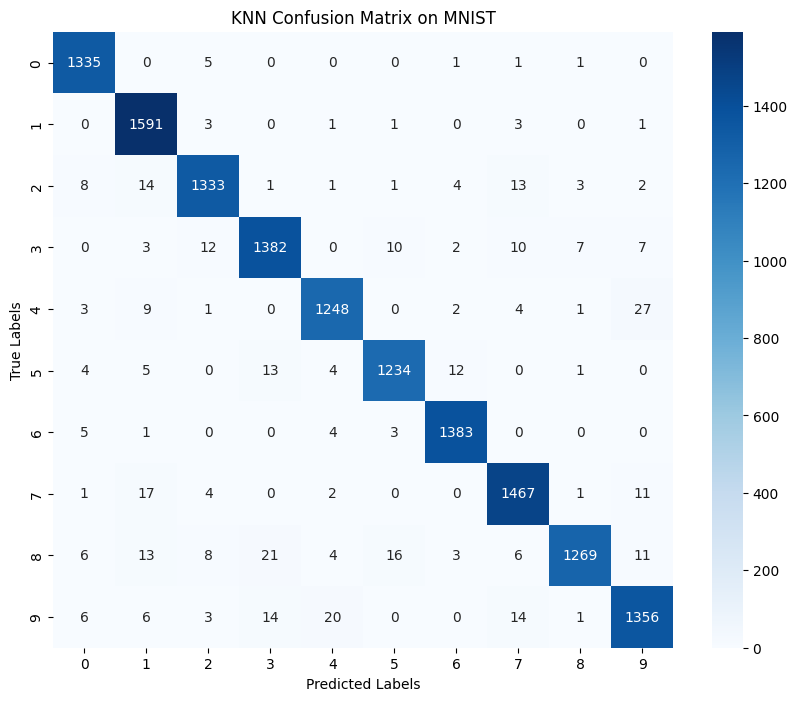

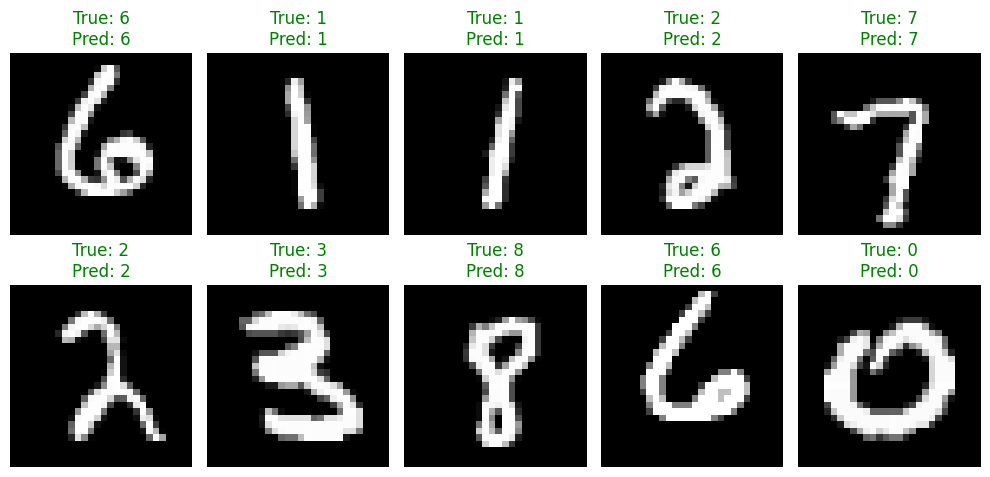

In [8]:
# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 4: Train KNN model
print("Training KNN model...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test)

# Step 6: Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc * 100:.2f}%")

# Step 7: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix on MNIST")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 9: Visualize Random Predictions
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    
    # Color title: green for correct, red for wrong
    color = 'green' if y_pred[idx] == y_test[idx] else 'red'
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
